<h2> Nearest Neighbors algorithm</h2>
<h3> Loading the dataset</h3>

In [15]:
import numpy as np
import csv
import os

dataset_path = "C:\IMaR\data_folder\ionosphere.data"
data_filename = os.path.join(dataset_path)
#creating the X and y NumPy arrays to store the dataset in.
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')
#Import it and set up a csv reader object
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    #loop over the lines in the file,enumerate function gives the line's index as well 
    for i, row in enumerate(reader):
        #turning each into a float, and save that to the dataset
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] == 'g'
    print(y)
    print(X)

[ True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True Fa

<h3> Moving towards a standard workflow</h3>

In [16]:
#creating training and testing sets. importing the train_test_split function
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 14)
#importing the nearest neighbor class and creating an instance for it.
from sklearn.neighbors import KNeighborsClassifier 
estimator = KNeighborsClassifier()
# find the nearest neighbor for a new data point
estimator.fit(X_train, y_train)
#evaluate with a testing set
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


<h3>Running the algorithm</h3>

In [17]:
from sklearn.cross_validation import cross_val_score
#passing the original (full) dataset and classes in to sklearn.cross_validation function
scores = cross_val_score(estimator, X, y, scoring='accuracy')
#calculate average accuracy
average_accuracy = np.mean(scores) * 100 
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.3%


<h3>Setting parameters</h3>

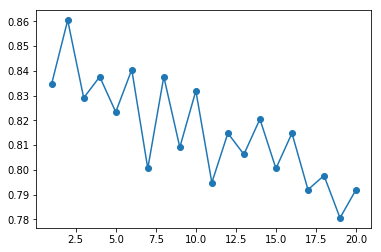

In [18]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Include 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)
    
%matplotlib inline
from matplotlib import pyplot as plt 
plt.plot(parameter_values, avg_scores, '-o')

<h3>Preprocessing using pipelines</h3>

In [19]:
X_broken = np.array(X)
X_broken[:,::2] /= 10


estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y, scoring='accuracy')
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y, scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

The original average accuracy for is 82.3%
The 'broken' average accuracy for is 71.5%


<h3> Standard preprocessing </h3>

In [20]:
#This class takes each feature and scales it to the range 0 to 1.
#The minimum value is replaced with 0, the maximum with 1, and the other values somewhere in between.
from sklearn.preprocessing import MinMaxScaler
#While MinMaxScalerdoesn't, some transformers need to be trained first in the same way that the classifiers do.
X_transformed = MinMaxScaler().fit_transform(X)

#1. Ensure the sum of the values for each sample equals to 1, using sklearn.preprocessing.Normalizer
#2. Force each feature to have a zero mean and a variance of 1, using sklearn.preprocessing.StandardScaler, 
#   which is a commonly used starting point for normalization
#3. Turn numerical features into binary features, where any value above a threshold is 1 and any below is 0, 
#   using sklearn.preprocessing.Binarizer

X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The average accuracy for is 82.3%


<h3> Pipelines </h3>
<p> Pipelines are a construct that addresses these problems (and others, which we will 
see in the next chapter). Pipelines store the steps in your data mining workflow. They 
can take your raw data in, perform all the necessary transformations, and then create 
a prediction.</p>

In [21]:
from sklearn.pipeline import Pipeline
#Pipelines take a list of steps as input, representing the chain of the data mining application. 
#The last step needs to be an Estimator, while all previous steps are Transformers. The input dataset is altered by each 
#Transformer, with the output of one step being the input of the next step.
#Each step is then represented by a tuple ('name', step).
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                             ('predict', KNeighborsClassifier())])
#Running the pipeline, using the cross validation code from before
scores = cross_val_score(scaling_pipeline, X_broken, y, 
scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".
format(np.mean(transformed_scores) * 100))

The pipeline scored an average accuracy for is 82.3%
